<a href="https://colab.research.google.com/github/eloiza-dias/cnn-correlation-code/blob/main/CNN_MSE_A549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell line A549

# Imports data structuring




In [22]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg
# Math
from math import ceil


# CNN template import

In [2]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

2022-08-03 14:19:31.067486: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-03 14:19:31.068024: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Documents from different files will be stored in this directory

In [23]:
os.getcwd()

'/usr/src/myapp/code/CNN'

In [24]:
diretorio = './../../results' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_2022-8-3.gz
1 -> images_de_X_train_a549_melhor_modelo_18_PACIENCE_500_2022-8-3.gz
2 -> images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_2022-8-3.gz
3 -> images_de_y_train_a549_melhor_modelo_18_PACIENCE_500_2022-8-3.gz
4 -> lista_img_camp_clar_100_resized_regressao_3T32022-8-2.gz
5 -> lista_img_camp_clar_100_resized_regressao_A5492022-8-3.gz
6 -> lista_img_camp_clar_100_resized_regressao_huh72022-8-2.gz
7 -> lista_img_camp_clar_25_resized_regressao_3T3_2022-8-2.gz
8 -> lista_img_camp_clar_25_resized_regressao_A5492022-8-3.gz
9 -> lista_img_camp_clar_25_resized_regressao_HUH72022-8-2.gz
10 -> lista_img_camp_clar_50_resized_regressao_3T3_2022-8-2.gz
11 -> lista_img_camp_clar_50_resized_regressao_A5492022-8-3.gz
12 -> lista_img_camp_clar_50_resized_regressao_HUH72022-8-2.gz
13 -> lista_img_camp_clar_75_resized_regressao_3T3_2022-8-2.gz
14 -> lista_img_camp_clar_75_resized_regressao_A5492022

Lists of all images in each file

In [6]:
#lstando arquivos com as imagens 100%, 75%, 50%, 25%
for k, v in enumerate(lista_dados): #percorra na lista_dados e retorne a chave e valor
    if k in [1,10,7,4]:          #Se a chave (k) for 12,14,16,17, print a chave e o valor  
        print(f'{k} -> {v}')

1 -> lista_img_camp_clar_100_resized_regressao_A5492022-8-3.gz
4 -> lista_img_camp_clar_25_resized_regressao_A5492022-8-3.gz
7 -> lista_img_camp_clar_50_resized_regressao_A5492022-8-3.gz
10 -> lista_img_camp_clar_75_resized_regressao_A5492022-8-3.gz


## x = features/images




In [7]:
#somando todas as imagens de diferentes tamanho
X_cem = joblib.load(diretorio+ '/' + lista_dados[1]) # carregar o arquivo que esta no diretorio e lista de dados na posição 12

X_setcin = joblib.load(diretorio+ '/' + lista_dados[10]) # carregar o arquivo que esta no diretorio e lista de dados na posição 14

X_cinq = joblib.load(diretorio+ '/' + lista_dados[7]) # carregar o arquivo que esta no diretorio e lista de dados na posição 16

X_vincin = joblib.load(diretorio+ '/' + lista_dados[4]) # carregar o arquivo que esta no diretorio e lista de dados na posição 18

x = np.asarray(list(X_cem) + list(X_setcin) + list(X_cinq) + list(X_vincin)) #somando os valores de cada lista

x.shape #Retornando a soma das imagens

(1136, 200, 200, 3)

## y = labels

Abrindo os rótulos que foram salvos na preparação das imagens

In [8]:
for k, v in enumerate(lista_dados):
    if k in [13,22,19,16]:
        print(f'{k} -> {v}')

13 -> lista_rotulo_camp_clar_100_resized_regressao_A5492022-8-3.gz
16 -> lista_rotulo_camp_clar_25_resized_regressao_A5492022-8-3.gz
19 -> lista_rotulo_camp_clar_50_resized_regressao_A5492022-8-3.gz
22 -> lista_rotulo_camp_clar_75_resized_regressao_A5492022-8-3.gz


In [9]:
#somando todos os rótulos de diferentes tamanho
y_cem = joblib.load(diretorio+ '/' + lista_dados[13])

y_setcin = joblib.load(diretorio+ '/' + lista_dados[22])

y_cinq = joblib.load(diretorio+ '/' + lista_dados[19])

y_vincin = joblib.load(diretorio+ '/' + lista_dados[16])

y = np.asarray(list(y_cem) + list(y_setcin) + list(y_cinq) + list(y_vincin))

y.shape

(1136,)

In [11]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Test and training separation from a library.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(795, 200, 200, 3) 
(341, 200, 200, 3) 
(795,) 
(341,)


In [13]:
data = timeProcess()[1]

In [14]:
joblib.dump(X_train, '/usr/src/myapp/results/images_de_X_train_a549_melhor_modelo_18_PACIENCE_500_'+data+'.gz')


['/usr/src/myapp/results//images_de_X_train_a549_melhor_modelo_18_PACIENCE_500_2022-8-3.gz']

In [15]:
joblib.dump(y_train, '/usr/src/myapp/results/images_de_y_train_a549_melhor_modelo_18_PACIENCE_500_'+data+'.gz')


['/usr/src/myapp/results//images_de_y_train_a549_melhor_modelo_18_PACIENCE_500_2022-8-3.gz']

In [16]:
joblib.dump(X_test, '/usr/src/myapp/results/images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_'+data+'.gz')


['/usr/src/myapp/results//images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_2022-8-3.gz']

In [17]:
joblib.dump(y_test, '/usr/src/myapp/results/images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_'+data+'.gz')


['/usr/src/myapp/results//images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_2022-8-3.gz']

### Model determination

In [18]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
#modelo.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

print(modelo.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 256)       2

2022-08-03 14:31:42.428065: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-03 14:31:42.432225: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 14:31:42.433016: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 14:31:42.433224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a8bce4a08e2b): /proc/driver/nvidia/version does not exist
2022-08-03 14:31:42.438407: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

# Training and testing epochs

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


In [20]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [21]:
# fit model
history = modelo.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=500, verbose=2, 
                    callbacks=[es]
                     )

2022-08-03 14:31:59.074142: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 95400000 exceeds 10% of free system memory.
2022-08-03 14:32:00.592794: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-03 14:32:00.652879: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800005000 Hz


Epoch 1/500


2022-08-03 14:32:01.960080: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15360000 exceeds 10% of free system memory.
2022-08-03 14:32:02.225278: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160579584 exceeds 10% of free system memory.
2022-08-03 14:32:03.595540: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40144896 exceeds 10% of free system memory.
2022-08-03 14:32:03.886030: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 77078528 exceeds 10% of free system memory.


25/25 - 57s - loss: 177838.4688 - mean_squared_error: 177838.4688 - val_loss: 164983.2188 - val_mean_squared_error: 164983.2188
Epoch 2/500
25/25 - 37s - loss: 115949.2031 - mean_squared_error: 115949.2031 - val_loss: 108810.2031 - val_mean_squared_error: 108810.2031
Epoch 3/500
25/25 - 36s - loss: 90322.7812 - mean_squared_error: 90322.7812 - val_loss: 97808.6719 - val_mean_squared_error: 97808.6719
Epoch 4/500
25/25 - 37s - loss: 80845.6875 - mean_squared_error: 80845.6875 - val_loss: 55668.5117 - val_mean_squared_error: 55668.5117
Epoch 5/500
25/25 - 35s - loss: 73477.7266 - mean_squared_error: 73477.7266 - val_loss: 52236.8516 - val_mean_squared_error: 52236.8516
Epoch 6/500
25/25 - 35s - loss: 68339.5547 - mean_squared_error: 68339.5547 - val_loss: 57900.4883 - val_mean_squared_error: 57900.4805
Epoch 7/500
25/25 - 36s - loss: 52872.5898 - mean_squared_error: 52872.5898 - val_loss: 54752.8867 - val_mean_squared_error: 54752.8867
Epoch 8/500
25/25 - 2537s - loss: 47315.4727 - mean_

In [ ]:
data = timeProcess()[1]

In [ ]:
modelo.save('./../../results/model__A549_regressao_menor_erro_Mean_squared_error_30%_18_PACIENCE'+data+'.h5')

## Accuracy Assessment

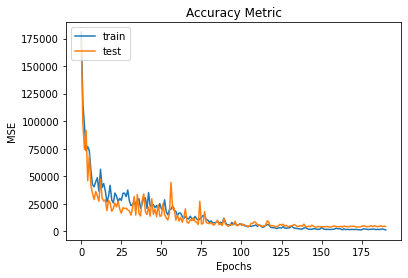

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy Metric')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

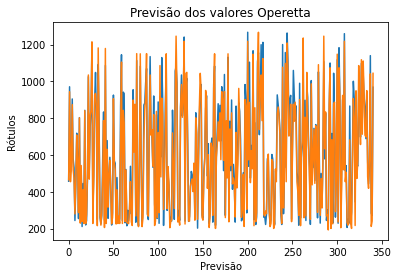

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.title('Previsão dos valores Operetta')
plt.ylabel('Rótulos')
plt.xlabel('Previsão')

plt.plot(prev)
plt.plot(y_test)
plt.show()

# # Qualit model analisys

In [ ]:

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_error(y_test, prev), 2)} Erro médio quadrático") #erro médio quadrático
# print(f"{round(median_absolute_error(y_test, prev), 2)}")#Erro médio absoluto sem %
#print(f"{round(median(y_test, prev), 2)} mediana") #erro médio quadrático



95.35% r2_score
50.21 Erro médio absoluto
4335.99 Erro médio quadrático
